# Training Models

## Questions

## Keywords

## Notes

### Linear Regression

- Simply a linear regression model is

y = a0 + a1x1 + a2x2 ....

- The constant a0 is called the bias term.

- y is the predictied value

- n is the number of features

- a is ith feature value

- We first need a measure of how well (or poorly), the model fits the training data. In chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square error. We need the find a value of the vector theta that minimizes the RMSE and it leats to the same results.

- The models complexity is n^2

- It is increasing as features increasing

Two solutions;

- Using a direct "closed form" equation that directly computes the model parameters that best fit the model to the training set.

- Using an iterative optimization approach called gradient descent. That gradually tweaks the model parameters to minimize the cost finction overr the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent that we eill use agin and again when we study neural networks.

## 1-Closed form Normal Equation

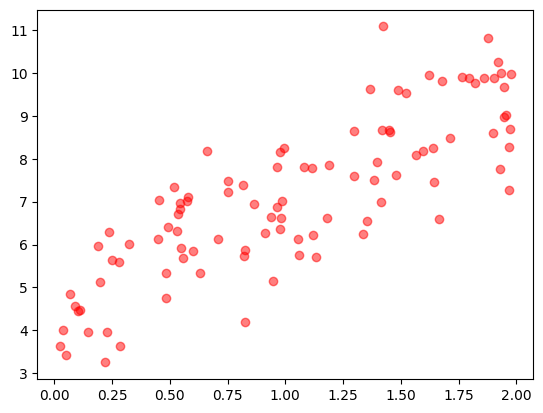

In [169]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y, alpha=0.5, color="red")
plt.show()


In [170]:
X_b = np.c_[np.ones((100, 1)), X]
X_b


array([[1.        , 1.92748257],
       [1.        , 1.33430757],
       [1.        , 0.48156934],
       [1.        , 1.62162584],
       [1.        , 1.29905912],
       [1.        , 0.91325524],
       [1.        , 1.64350997],
       [1.        , 0.54434754],
       [1.        , 0.99271169],
       [1.        , 1.3980644 ],
       [1.        , 1.41465212],
       [1.        , 0.96584849],
       [1.        , 0.94858664],
       [1.        , 1.45497223],
       [1.        , 0.22126003],
       [1.        , 1.94684925],
       [1.        , 1.12121253],
       [1.        , 0.53037582],
       [1.        , 0.28367373],
       [1.        , 1.96701375],
       [1.        , 1.29715949],
       [1.        , 0.82459352],
       [1.        , 1.9206666 ],
       [1.        , 0.19141534],
       [1.        , 1.76379045],
       [1.        , 0.98694249],
       [1.        , 1.97157418],
       [1.        , 0.32519279],
       [1.        , 0.54370223],
       [1.        , 0.05229988],
       [1.

In [171]:
# Normal Equation

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.50633285],
       [2.52268758]])

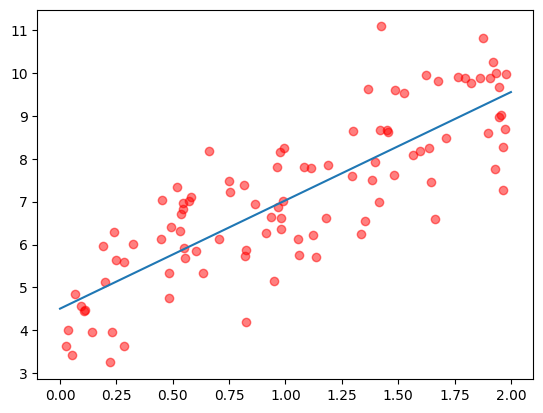

In [172]:
# Those are the parameters
def func(x): return theta_best.flatten()[0] + theta_best.flatten()[1] * x


space = np.linspace(0, 2, 10)
plt.scatter(X, y, alpha=0.5, color="red")
plt.plot(space, func(space))
plt.show()

In [173]:
X.reshape(1, -1)

array([[1.92748257, 1.33430757, 0.48156934, 1.62162584, 1.29905912,
        0.91325524, 1.64350997, 0.54434754, 0.99271169, 1.3980644 ,
        1.41465212, 0.96584849, 0.94858664, 1.45497223, 0.22126003,
        1.94684925, 1.12121253, 0.53037582, 0.28367373, 1.96701375,
        1.29715949, 0.82459352, 1.9206666 , 0.19141534, 1.76379045,
        0.98694249, 1.97157418, 0.32519279, 0.54370223, 0.05229988,
        1.36599508, 0.02488345, 0.0664568 , 0.96381903, 0.54917459,
        1.97674679, 0.45157645, 0.53542701, 1.41952765, 1.90546616,
        0.86305452, 1.95586755, 0.9761481 , 1.89984227, 0.09129062,
        0.97874101, 0.10957576, 1.35176959, 1.05415699, 1.5958164 ,
        1.6387707 , 1.4488885 , 1.52448102, 0.51698563, 0.03596404,
        0.60133433, 1.96660772, 0.19869482, 0.75180033, 1.67815625,
        0.24855105, 0.70715179, 0.75040988, 1.79629595, 1.71375225,
        1.86197391, 0.82228453, 0.44706896, 0.48185271, 1.82170776,
        0.93758065, 1.94776627, 1.87713953, 0.81

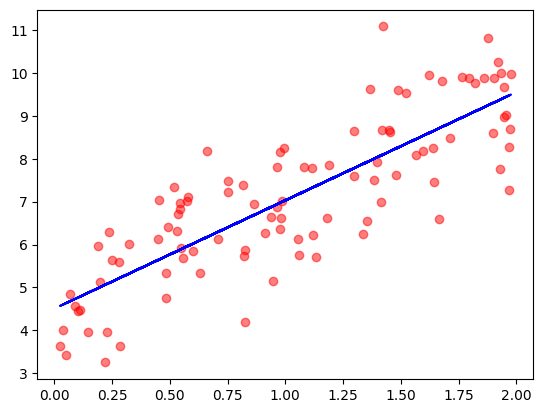

In [174]:
# Using scikit learn.

from sklearn.linear_model import LinearRegression

l = LinearRegression(fit_intercept=True)
l.fit(X, y)


plt.scatter(X, y, alpha=0.5, color="red")
plt.plot(X, l.predict(X), color="b")
plt.show()


In [175]:
l.coef_

array([[2.52268758]])

Both the Normal Equation and the SVD approach get very slow when the number of features grows large. On the positive side both are linear with regard to the number of instancees in the training set.

## Gradient Descent

- Gradient descent is a generic algorithm to find the minima of the cost function.

- Downside of the gradient descent algorithm is that it can get stuck on the plateus for a function that is not have much gradient or it can get
stuck in the local minima.

- When using gradient descent you should ensure that all features have a similar scale, or lese it will take much longer to converge.

- Batch gradient descent takes all of the data in one iteration, on the opposite extreme stochastic gradient descent takes one instance at first and tries to optimize for that random x value

- Mini Batch Gradient descent is taking randomly mini batch instances to calcylate the model's parameters.

## Polynimial Regression.

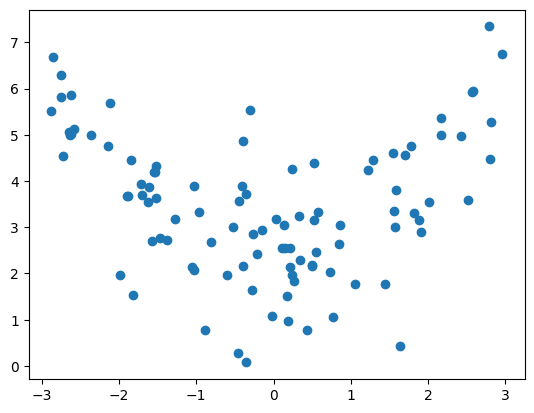

In [176]:
m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m, 1)

plt.scatter(X, y)


In [177]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[ 1.13052432e-01,  1.27808524e-02],
       [-2.64565996e+00,  6.99951663e+00],
       [-3.00023316e-01,  9.00139899e-02],
       [ 3.26940997e-01,  1.06890416e-01],
       [-6.06175644e-01,  3.67448912e-01],
       [ 3.70765176e-02,  1.37466816e-03],
       [ 1.56575454e+00,  2.45158729e+00],
       [ 1.87812234e+00,  3.52734351e+00],
       [-4.01175017e-01,  1.60941394e-01],
       [-1.02783293e+00,  1.05644054e+00],
       [-1.70064935e+00,  2.89220820e+00],
       [-2.60226210e-02,  6.77176804e-04],
       [-2.79656961e-01,  7.82080159e-02],
       [ 2.95718126e+00,  8.74492098e+00],
       [-2.69281747e-01,  7.25126591e-02],
       [ 1.81718271e+00,  3.30215301e+00],
       [-1.05459945e+00,  1.11217999e+00],
       [ 1.74959491e-01,  3.06108235e-02],
       [-1.88757633e+00,  3.56294442e+00],
       [ 2.01341282e+00,  4.05383117e+00],
       [-2.87796107e+00,  8.28265995e+00],
       [ 2.70934331e-01,  7.34054117e-02],
       [ 1.05618436e+00,  1.11552540e+00],
       [-1.

In [178]:
l = LinearRegression()
l.fit(X_poly, y)

l.coef_, l.intercept_

(array([[0.00177731, 0.42469951]]), array([2.39319531]))

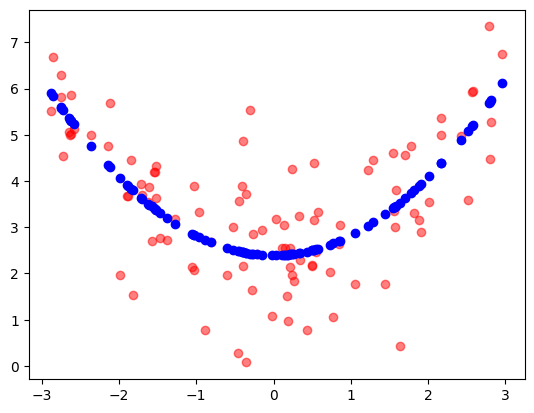

In [179]:
plt.scatter(X, y, alpha=0.5, color="red")
plt.scatter(X, l.predict(X_poly), color="b")
plt.show()

## Regularization
### Bias And Variance.

- Inabilty of a machine learning method to capture true relationship is called bias.

- Ability to learn the training data called variance.

- In machine learning the ideal algorithm has low bias and accurately model the true relationship.

- And it has low variablity by producing consistent predictions across different datasets.

- This is done by finding the sweet spot between a simple model and a complex model.

- Regularization constrain the weights.



### Rigde

- Ridge regression is a regularized version of Linear Regression.

- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term only be addet to the cost function during training. Once the model is trained you want to use the unregularized performance to measure to evaluate the model's performance.

- if alpha = 0 then ridge regression is just linear regression if alpha is really large the model weights are up to very close to 0 end up very close to zero and the result is a flat line going through the data's mean.

- Ridge regression is actually a squared penalty, if you think in general.

### Lasso
- An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features.

### Elastic Net

- Elastic net is a combination of lasso and ridge. There is a more hyperparameter called r when it equals to 0 it is equal to ridge and when it equals to 1 it is lasso.

- Generally speaking you should avoid using linear regression.

### Early stopping

- Is a simple and useful technique for reducing overfitting you stop the gradient descent when validation set is not learning anymore.


### My Excercise.



In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline


In [181]:
df = pd.read_csv("Hitters_Data.csv").dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [182]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [183]:
# One Hot Encoding.
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(drop="first", sparse_output=False)
cats = df.select_dtypes("object").columns

encoded_cats = one.fit_transform(df[cats])
encoded_cats

array([[1., 1., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 1

In [184]:
# Standart Scaler.
from sklearn.preprocessing import StandardScaler

sl = StandardScaler()

df_x = sl.fit_transform(df.drop(columns=cats))


In [185]:
df.shape

(263, 20)

In [186]:
from sklearn.compose import ColumnTransformer

num_attribs = df.drop(columns=[*cats, "Salary"]).columns
cat_attribs = cats

prep_pipe = ColumnTransformer(
    [("num", StandardScaler(), num_attribs), ("cat", OneHotEncoder(
        drop="first", sparse_output=False), cat_attribs)]
)

prep_pipe.fit_transform(df).shape

(263, 19)

In [187]:
from sklearn.model_selection import train_test_split

target = np.log(df[["Salary"]])
features = df.drop(columns=["Salary"])

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=1337)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 19), (53, 19), (210, 1), (53, 1))

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

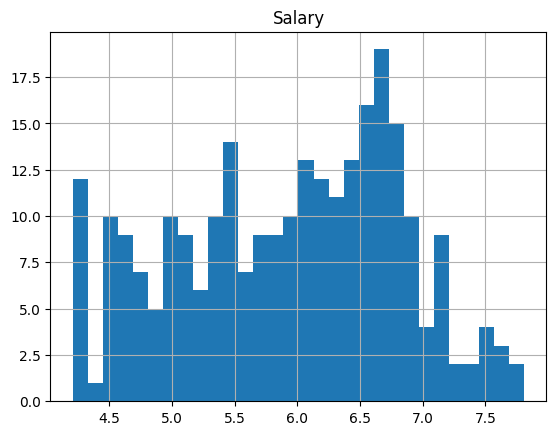

In [188]:
target.hist(bins=30)

In [189]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("preprocess", prep_pipe), ("Ridge", Ridge(alpha=9))])


pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


-0.08042916029876124

In [190]:
pipe.named_steps["Ridge"].coef_

array([[ 0.03514509,  0.23350032,  0.04104643,  0.02428613, -0.05790308,
         0.1210308 ,  0.27873149,  0.07306466,  0.12415812, -0.02542631,
         0.09126619, -0.0367772 ,  0.00771245,  0.08732074,  0.01784434,
        -0.07129644,  0.10754759, -0.18107167, -0.06650198]])

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("preprocess", prep_pipe), ("Ridge", Ridge(alpha=1))])

param_grid = {"Ridge__alpha": np.arange(100)}

grid_search = GridSearchCV(pipe, param_grid, scoring="r2", cv=20)

grid_search.fit(X_train, y_train)

grid_search.best_params_


{'Ridge__alpha': 59}

In [192]:
print("Best Score (r2) is:", grid_search.best_score_)
print("Best Param is:", grid_search.best_params_)

Best Score (r2) is: 0.45804037673346365
Best Param is: {'Ridge__alpha': 59}


In [193]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010758,0.008409,0.005026,0.001534,0,{'Ridge__alpha': 0},0.694297,0.002208,-0.396760,0.139501,...,0.512648,-0.439339,0.581057,0.533099,0.714290,-0.321671,0.473402,0.377756,0.367009,100
1,0.005768,0.000866,0.003350,0.000776,1,{'Ridge__alpha': 1},0.700090,-0.003933,-0.363645,0.156654,...,0.556502,-0.388712,0.597072,0.544792,0.722819,0.049866,0.485178,0.406759,0.332807,99
2,0.005702,0.002985,0.003916,0.001972,2,{'Ridge__alpha': 2},0.702960,-0.010227,-0.321779,0.174733,...,0.591779,-0.350539,0.598475,0.546947,0.726723,0.095034,0.481773,0.416642,0.323098,98
3,0.006038,0.000883,0.003581,0.000813,3,{'Ridge__alpha': 3},0.705148,-0.015342,-0.288812,0.188208,...,0.616126,-0.323295,0.599668,0.546182,0.728955,0.118712,0.478875,0.423156,0.316497,97
4,0.005643,0.000856,0.003254,0.000777,4,{'Ridge__alpha': 4},0.706933,-0.019399,-0.262089,0.198718,...,0.633820,-0.302703,0.600985,0.544454,0.730567,0.134493,0.476811,0.427958,0.311564,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005876,0.001139,0.002908,0.001029,95,{'Ridge__alpha': 95},0.729093,0.069487,-0.048863,0.248984,...,0.704315,-0.134944,0.655685,0.435199,0.767472,0.151516,0.527398,0.456700,0.272677,59
96,0.005925,0.001724,0.003247,0.001258,96,{'Ridge__alpha': 96},0.729084,0.070517,-0.049177,0.249031,...,0.704091,-0.134511,0.655835,0.434613,0.767614,0.150970,0.527677,0.456639,0.272611,61
97,0.005866,0.001100,0.003499,0.000916,97,{'Ridge__alpha': 97},0.729073,0.071541,-0.049496,0.249082,...,0.703867,-0.134084,0.655981,0.434034,0.767752,0.150428,0.527952,0.456576,0.272546,62
98,0.006324,0.001302,0.003555,0.001276,98,{'Ridge__alpha': 98},0.729062,0.072558,-0.049819,0.249137,...,0.703643,-0.133660,0.656122,0.433461,0.767888,0.149888,0.528223,0.456513,0.272481,64


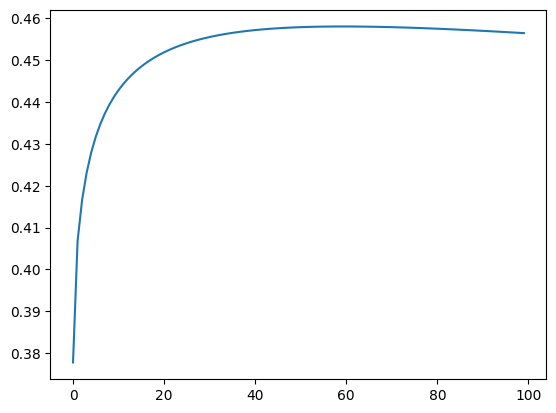

In [194]:
plt.plot(grid_search.cv_results_["param_Ridge__alpha"],
         grid_search.cv_results_["mean_test_score"])

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ("preprocess", prep_pipe),
    ("Model", Ridge())
])

param_grid = [
    {"Model": [Ridge(max_iter=10000)],
     "Model__alpha": np.linspace(1, 100, 100)},
    {"Model": [Lasso(max_iter=10000)],
     "Model__alpha": np.linspace(1, 100, 100)},
    {"Model": [LinearRegression()]}
]

grid_search = GridSearchCV(pipe, param_grid, scoring="r2", cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         Index(['League', 'Division...
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
                         {'Model': [LinearRegression()]}],
             scoring='r2')

In [196]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011636,0.002897,0.007400,0.001213,"Ridge(alpha=25.0, max_iter=10000)",1.0,"{'Model': Ridge(alpha=25.0, max_iter=10000), '...",0.502399,0.544988,0.606783,0.506207,0.518091,0.535694,0.038543,100
1,0.007800,0.001720,0.004912,0.001860,"Ridge(alpha=25.0, max_iter=10000)",2.0,"{'Model': Ridge(alpha=25.0, max_iter=10000), '...",0.506516,0.543040,0.610696,0.516031,0.527382,0.540733,0.037039,99
2,0.005601,0.000800,0.003958,0.000637,"Ridge(alpha=25.0, max_iter=10000)",3.0,"{'Model': Ridge(alpha=25.0, max_iter=10000), '...",0.510367,0.541327,0.613446,0.521963,0.530791,0.543579,0.036388,98
3,0.005803,0.000684,0.003344,0.000430,"Ridge(alpha=25.0, max_iter=10000)",4.0,"{'Model': Ridge(alpha=25.0, max_iter=10000), '...",0.513883,0.539797,0.615589,0.525952,0.532267,0.545497,0.036061,93
4,0.005457,0.001069,0.003729,0.000990,"Ridge(alpha=25.0, max_iter=10000)",5.0,"{'Model': Ridge(alpha=25.0, max_iter=10000), '...",0.517094,0.538411,0.617349,0.528816,0.532869,0.546908,0.035909,81


In [197]:
grid_search.best_params_

{'Model': Ridge(alpha=25.0, max_iter=10000), 'Model__alpha': 25.0}

In [198]:
grid_search.best_score_

0.5530366414932576

In [199]:
len(X_train.columns)


19

In [200]:
coefs = grid_search.best_estimator_.named_steps["Model"].coef_[0]

pd.Series(index=X_train.columns, data=coefs)

AtBat        0.059375
Hits         0.161798
HmRun        0.009301
Runs         0.058036
RBI         -0.017033
Walks        0.095766
Years        0.215205
CAtBat       0.087189
CHits        0.109397
CHmRun      -0.029328
CRuns        0.085779
CRBI         0.008414
CWalks       0.035786
League       0.080611
Division     0.015190
PutOuts     -0.062115
Assists      0.061288
Errors      -0.141269
NewLeague   -0.026422
dtype: float64

In [201]:
# Lets Checkout the real score

grid_search.score(X_test, y_test)

-0.06025833197630459

### Solution

I'm not able to converge to a good solution therefore let's exercise the good solution.

In [202]:
df = pd.read_csv("Hitters_Data.csv").dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [203]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

<Axes: xlabel='Salary', ylabel='Count'>

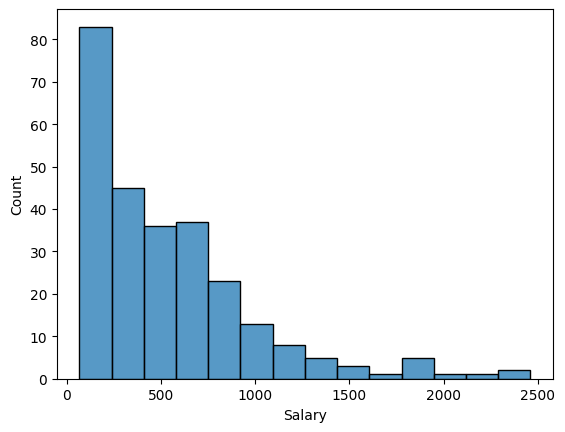

In [204]:
sns.histplot(df.Salary)


<Axes: xlabel='Salary', ylabel='Count'>

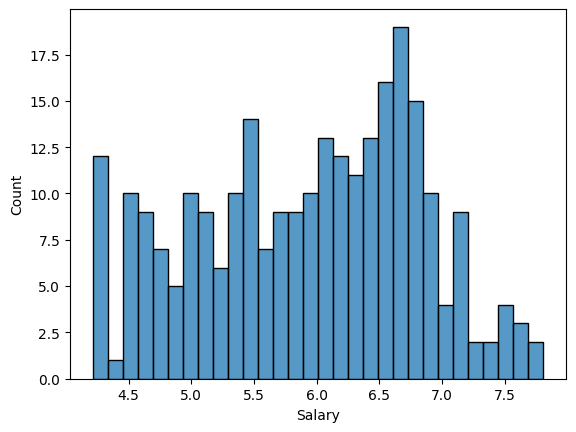

In [205]:
sns.histplot(np.log(df.Salary), bins=30)


In [206]:
dummies = pd.get_dummies(df[["League", "Division", "NewLeague"]])

In [207]:
dummies = dummies.astype("uint")
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [208]:
y = np.log(df.Salary)

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],
             axis=1).astype('float64')

X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint32 
 17  Division_W   263 non-null    uint32 
 18  NewLeague_N  263 non-null    uint32 
dtypes: float64(16

In [209]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [210]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Scale both training set and test set (be careful do them independently!)
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [211]:
pd.DataFrame(X_trainStandard, columns=X_train.columns)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,0.528751,0.359514,1.806249,0.845864,1.595538,1.363549,-0.723487,-0.406970,-0.424290,0.393766,-0.253071,-0.028313,-0.032802,-0.207715,-0.728823,-0.327745,0.978492,-0.989189,1.033158
1,-1.102462,-1.205006,-1.372442,-1.543158,-1.033297,-0.497215,3.280169,4.690221,5.115506,0.998899,5.144653,2.811912,4.628427,0.811062,-0.495095,-0.327745,0.978492,1.010929,1.033158
2,-0.821454,-0.455799,-0.901525,-0.838201,-0.530726,0.167344,-1.324035,-1.044795,-0.987783,-0.816499,-0.999473,-0.920453,-0.829409,-0.633063,-0.771319,-0.957563,0.978492,1.010929,1.033158
3,-0.389663,-0.257480,-0.666066,-0.250737,-0.376088,-0.940254,0.477610,0.073481,0.068949,0.079563,-0.002349,0.220317,-0.197865,-0.440970,-0.771319,-0.485199,0.978492,1.010929,1.033158
4,0.974250,0.623940,2.159437,1.080849,1.402242,0.610383,-1.324035,-0.935715,-0.916066,-0.513933,-0.858262,-0.774201,-0.793526,-0.444400,-0.757154,0.931891,-1.021981,1.010929,-0.967906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-1.040777,-0.676154,-0.783796,-0.759872,-0.492066,-1.250382,-0.323121,-0.780839,-0.771168,-0.723402,-0.800625,-0.750800,-0.703818,-0.832016,-0.799650,-1.115017,-1.021981,-0.989189,-0.967906
180,1.248404,2.210495,-0.430608,2.059956,0.745033,2.825579,-0.523304,-0.003957,0.317764,-0.490658,0.271427,-0.089739,0.505446,-0.567888,1.091426,1.719163,-1.021981,-0.989189,-0.967906
181,-0.108656,0.271372,0.158039,-0.015751,0.242461,-0.231392,0.877976,-0.272494,-0.244265,-0.385924,-0.267480,-0.171640,-0.176335,-0.780562,0.305248,0.144618,0.978492,1.010929,1.033158
182,-0.924262,-0.808367,-1.254713,-1.112351,-1.110616,-0.497215,-0.723487,-0.790831,-0.791658,-0.758313,-0.855380,-0.791751,-0.682288,-0.705097,0.241504,-0.642654,0.978492,-0.989189,1.033158


In [212]:
# The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model.
ridge2 = Ridge(alpha=4)
# Fit a ridge regression on the training data
ridge2.fit(X_trainStandard, y_train)
# Use this model to predict the test data
pred2 = ridge2.predict(X_testStandard)
print(pd.Series(ridge2.coef_, index=X.columns))  # Print coefficients
print(mean_squared_error(y_test, pred2))

AtBat         -0.147409
Hits           0.327964
HmRun         -0.001754
Runs          -0.019342
RBI            0.065866
Walks          0.203377
Years          0.314675
CAtBat         0.044138
CHits          0.114225
CHmRun         0.093418
CRuns          0.076718
CRBI          -0.005580
CWalks        -0.197914
PutOuts        0.088957
Assists       -0.003355
Errors        -0.042563
League_N       0.053127
Division_W    -0.087473
NewLeague_N    0.017697
dtype: float64
0.42264223361835623


In [213]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("Ridge", Ridge(alpha=9))
])

param_grid = [
    {"Ridge__alpha": list(range(1, 100))}
]
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring="r2")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Ridge', Ridge(alpha=9))]),
             param_grid=[{'Ridge__alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...]}],
             scoring='r2')

In [214]:
grid_search.best_params_


{'Ridge__alpha': 22}

In [215]:
grid_search.score(X_test, y_test)


0.45762865350726345

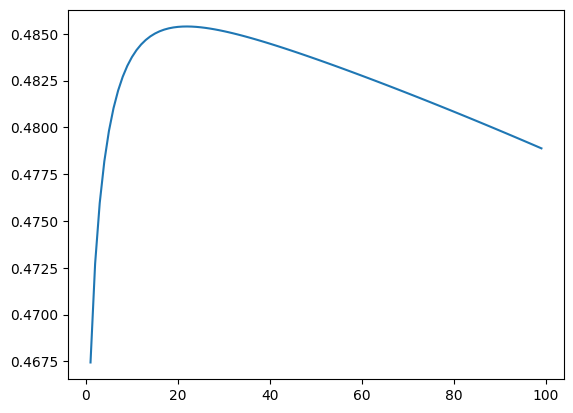

In [216]:
plt.plot(grid_search.cv_results_["param_Ridge__alpha"], grid_search.cv_results_["mean_test_score"])

### Is it changing with scaling one hot?

In [226]:
df = pd.read_csv('Hitters_Data.csv').dropna()

In [227]:
dummies = pd.get_dummies(df[["League", "Division", "NewLeague"]])

In [228]:
dummies = dummies.astype("uint")


In [229]:
y = np.log(df.Salary)

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],
             axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
cat = ['League_N', 'Division_W', 'NewLeague_N']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint32 
 17  Division_W   263 non-null    uint32 
 18  NewLeague_N  263 non-null    uint32 
dtypes: float64(16

In [230]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [231]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Scale both training set and test set (be careful do them independently!)
scaler.fit(X_train.drop(columns=cat))
X_trainStandard_ = scaler.transform(X_train.drop(columns=cat))
X_testStandard_ = scaler.transform(X_test.drop(columns=cat))

X_trainStandard = np.concatenate([X_trainStandard_, X_train[cat]], axis=1)
X_testStandard = np.concatenate([X_testStandard_, X_test[cat]], axis=1)

pd.DataFrame(X_trainStandard, columns=X_train.columns)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,0.528751,0.359514,1.806249,0.845864,1.595538,1.363549,-0.723487,-0.406970,-0.424290,0.393766,-0.253071,-0.028313,-0.032802,-0.207715,-0.728823,-0.327745,1.0,0.0,1.0
1,-1.102462,-1.205006,-1.372442,-1.543158,-1.033297,-0.497215,3.280169,4.690221,5.115506,0.998899,5.144653,2.811912,4.628427,0.811062,-0.495095,-0.327745,1.0,1.0,1.0
2,-0.821454,-0.455799,-0.901525,-0.838201,-0.530726,0.167344,-1.324035,-1.044795,-0.987783,-0.816499,-0.999473,-0.920453,-0.829409,-0.633063,-0.771319,-0.957563,1.0,1.0,1.0
3,-0.389663,-0.257480,-0.666066,-0.250737,-0.376088,-0.940254,0.477610,0.073481,0.068949,0.079563,-0.002349,0.220317,-0.197865,-0.440970,-0.771319,-0.485199,1.0,1.0,1.0
4,0.974250,0.623940,2.159437,1.080849,1.402242,0.610383,-1.324035,-0.935715,-0.916066,-0.513933,-0.858262,-0.774201,-0.793526,-0.444400,-0.757154,0.931891,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-1.040777,-0.676154,-0.783796,-0.759872,-0.492066,-1.250382,-0.323121,-0.780839,-0.771168,-0.723402,-0.800625,-0.750800,-0.703818,-0.832016,-0.799650,-1.115017,0.0,0.0,0.0
180,1.248404,2.210495,-0.430608,2.059956,0.745033,2.825579,-0.523304,-0.003957,0.317764,-0.490658,0.271427,-0.089739,0.505446,-0.567888,1.091426,1.719163,0.0,0.0,0.0
181,-0.108656,0.271372,0.158039,-0.015751,0.242461,-0.231392,0.877976,-0.272494,-0.244265,-0.385924,-0.267480,-0.171640,-0.176335,-0.780562,0.305248,0.144618,1.0,1.0,1.0
182,-0.924262,-0.808367,-1.254713,-1.112351,-1.110616,-0.497215,-0.723487,-0.790831,-0.791658,-0.758313,-0.855380,-0.791751,-0.682288,-0.705097,0.241504,-0.642654,1.0,0.0,1.0


In [232]:
r = Ridge(alpha=4)

r.fit(X_trainStandard, y_train)

r.score(X_testStandard, y_test)


0.4602862709820129

In [233]:
df.columns


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [234]:
from sklearn.preprocessing import OneHotEncoder

cats = ["League", "Division", "NewLeague"]
X_ = df.drop(columns=[*cats, "Salary"]).values
y = df["Salary"].values
ohe = OneHotEncoder(drop="first", sparse_output=False)
X_cat = ohe.fit_transform(df[cats])

X_cat

array([[1., 1., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 1

In [235]:
X = np.concatenate([X_, X_cat], axis=1)
y = np.log(y)


In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [237]:
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge(alpha=44))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5258316677257329

In [238]:
param_grid = [{"ridge__alpha": np.linspace(0, 50, 100)}]

grid_search = GridSearchCV(pipe, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameter is", grid_search.best_params_)
print("Best estimator is", grid_search.best_estimator_)
print("Best score is", grid_search.best_params_)
print("R2 score testing is: ", grid_search.score(X_test, y_test))

Best parameter is {'ridge__alpha': 50.0}
Best estimator is Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=50.0))])
Best score is {'ridge__alpha': 50.0}
R2 score testingm is:  0.5244687386389315


[Text(-20.0, 0, '-20.0'),
 Text(0.0, 0, '0.0'),
 Text(20.0, 0, '20.0'),
 Text(40.0, 0, '40.0'),
 Text(60.0, 0, '60.0'),
 Text(80.0, 0, '80.0'),
 Text(100.0, 0, '100.0'),
 Text(120.0, 0, '120.0')]

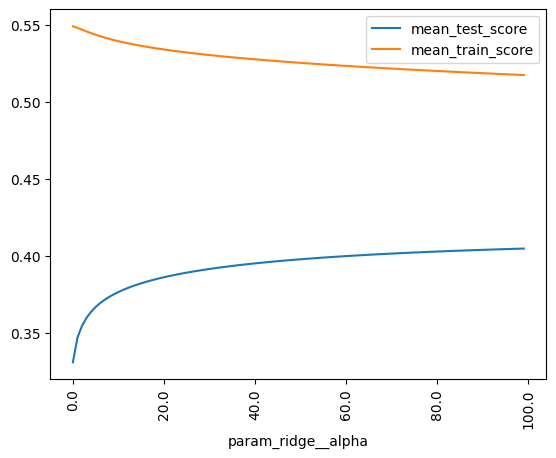

In [261]:
ax = pd.DataFrame(grid_search.cv_results_)[["param_ridge__alpha",
                                            "mean_test_score",
                                            "mean_train_score"]].set_index("param_ridge__alpha").plot.line()
ax.tick_params("x", labelrotation=90)
ax.set_xticklabels(
    [f"{i:.1f}" for i in ax.get_xticks()]
)


## Logistic Regression.

- Some regression algorithms can be used for classification. Logistic regression is an example of that.

- logit is t, where 1 / (1 + exp(-t))

- Logistic regression is a binary classifier.

### Exersize